In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
graph = nx.Graph()

# graph.add_nodes_from(["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k"])
# # XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# graph.add_edges_from([("a", "b"), ("a", "c"), ("a", "d"), ("a", "e"),
#                       ("b", "c"), ("b", "d"),
#                       ("c", "e"), ("c", "f"),
#                       ("d", "e"), 
#                       ("e", "f"),
#                       ("f", "g"), 
#                       ("g", "h"), ("g", "i"), ("g", "k"), 
#                       ("h", "j"),  
#                       ("i", "j"), ("i", "k"), 
#                       ("j", "k")])

# graph.add_nodes_from(["a", "b", "c", "d", "e", "f", "g", "h"])
# # XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# graph.add_edges_from([("a", "b"), ("a", "e"),
#                       ("b", "c"), ("b", "f"),
#                       ("c", "d"), ("c", "f"), ("c", "h"),
#                       ("d", "h"), 
#                       ("e", "f"),
#                       ("f", "g"), 
#                       ("g", "h")])

In [14]:
adj_mat = np.matrix([
    [0, 1, 0, 1, 1, 1, 0, 0], 
    [1, 0, 0, 1, 1, 0, 1, 0], 
    [0, 0, 0, 1, 0, 1, 1, 1], 
    [1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 0, 1], 
    [1, 0, 1, 0, 1, 0, 0, 0], 
    [0, 1, 1, 1, 0, 0, 0, 1], 
    [0, 0, 1, 1, 1, 0, 1, 0]

])

In [15]:
labels = { 0 : "a", 1: "b", 2 : "c", 3: "d", 4 : "e", 5: "f", 6 : "g", 7: "h" }

In [16]:
graph = nx.from_numpy_matrix(adj_mat, create_using=nx.Graph)

In [17]:
graph = nx.relabel_nodes(graph, labels)

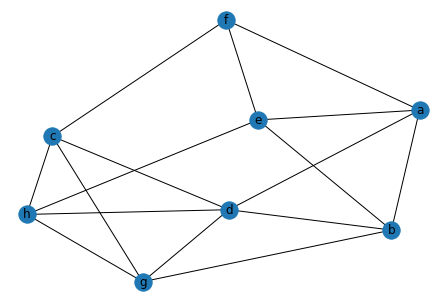

In [18]:
nx.draw(graph, with_labels = True)
plt.show()

In [21]:
# slides question modularity 
# initial_communities = [["a", "b","d", "f"], [ "c", "e", "g", "h"]]
# initial_communities = [["a", "f","c", "g"], [ "b", "d", "e", "h"]]
initial_communities = [["a", "c", "f"], [ "b", "d", "e", "g", "h"]]
# initial_communities = [["a", "d", "f", "h", "j"], ["b", "c", "e", "g", "i", "k"]]

# assignment 
# initial_communities = [["c", "d", "h", "g"], ["a", "b", "e", "f"]]
# initial_communities = [["e", "f", "h"], ["a", "b", "c", "d", "g"]]


best_q = nx.community.modularity(graph, communities=initial_communities)

print(f"Graph communities modularity: {round(best_q, 2)}")
print(f"Graph communities: {initial_communities}\n")

iteration = 0
while True:
    iteration += 1
    all_nodes_q = {}

    for n in sorted(graph.nodes()):
        if (n in initial_communities[0]):
            new_communities = [[a for a in initial_communities[0] if a != n], initial_communities[1] + [n]]
            new_q = nx.community.modularity(graph, communities=new_communities)
            all_nodes_q[n] = new_q
        elif (n in initial_communities[1]):
            new_communities = [[a for a in initial_communities[1] if a != n], initial_communities[0] + [n]]
            new_q = nx.community.modularity(graph, communities=new_communities)
            all_nodes_q[n] = new_q


    best_q_key = max(all_nodes_q, key=(lambda key: all_nodes_q[key]))
    if (all_nodes_q[best_q_key] > best_q):
        best_q = all_nodes_q[best_q_key]
        if (best_q_key in initial_communities[0]):
            initial_communities[0].remove(best_q_key)
            initial_communities[1].append(best_q_key)
        elif (best_q_key in initial_communities[1]):
            initial_communities[1].remove(best_q_key)
            initial_communities[0].append(best_q_key)
            
        print(f"{iteration}: {initial_communities}")
        print(f"best Q: {best_q}")
        print("\n")
    else:
        print(f"Final modularity: {best_q}")
        break

Graph communities modularity: 0.01
Graph communities: [['a', 'c', 'f'], ['b', 'd', 'e', 'g', 'h']]

1: [['a', 'c', 'f', 'e'], ['b', 'd', 'g', 'h']]
best Q: 0.060546875


2: [['a', 'f', 'e'], ['b', 'd', 'g', 'h', 'c']]
best Q: 0.138671875


3: [['a', 'f', 'e', 'b'], ['d', 'g', 'h', 'c']]
best Q: 0.185546875


Final modularity: 0.185546875
